# 🚀 Getting Started with Deep Learning Framework

Welcome to your custom deep learning framework! This notebook will guide you through the basics.

## 📚 What You'll Learn:
- How to import and use the framework
- Create your first neural network
- Train on simple data
- Visualize results

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add the parent directory to path to import our deep learning framework
sys.path.insert(0, os.path.abspath('..'))

from deep_learning import NeuralNetwork
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("✅ All imports successful!")
print("🧠 Deep Learning Framework loaded!")

✅ All imports successful!
🧠 Deep Learning Framework loaded!


## 🎯 Step 1: Create Some Sample Data

Let's start with a simple binary classification problem.

📊 Data shape: X = (2, 500), y = (1, 500)
🎯 Classes: [0 1]


.\deep_learning_env\Lib\site-packages\IPython\core\profiledir.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Deja
  fig.canvas.print_figure(bytes_io, **kw)


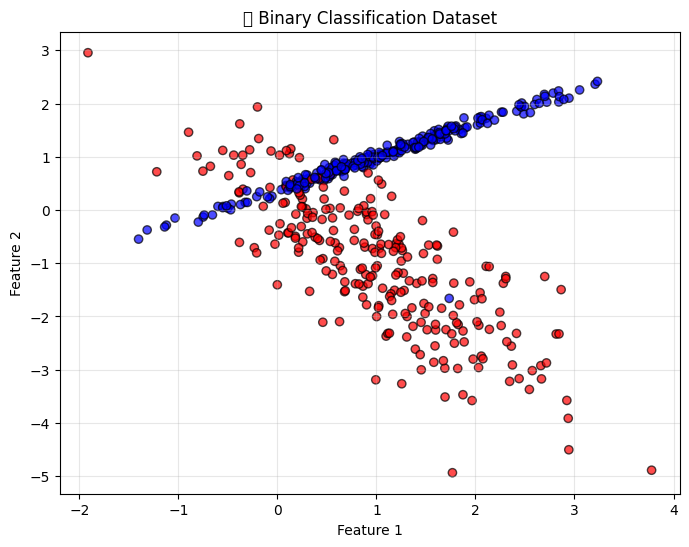

In [2]:
# Create a simple binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# Convert to our framework format
y = (y + 1) // 2  # Convert from {-1, 1} to {0, 1}
y = y.reshape(1, -1)  # Shape: (1, n_samples)
X = X.T  # Shape: (n_features, n_samples)

print(f"📊 Data shape: X = {X.shape}, y = {y.shape}")
print(f"🎯 Classes: {np.unique(y)}")

# Visualize the data
plt.figure(figsize=(8, 6))
colors = ['red' if label == 0 else 'blue' for label in y[0, :]]
plt.scatter(X[0, :], X[1, :], c=colors, alpha=0.7, edgecolors='black')
plt.title('📊 Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.show()

## 🏗️ Step 2: Build Your Neural Network

Now let's create and train a neural network using our framework!

In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X.T, y.T, test_size=0.2, random_state=42
)
X_train, X_test = X_train.T, X_test.T
y_train, y_test = y_train.T, y_test.T

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.T).T
X_test = scaler.transform(X_test.T).T

print(f"🔄 Training data: {X_train.shape}")
print(f"🔄 Test data: {X_test.shape}")

🔄 Training data: (2, 400)
🔄 Test data: (2, 100)


In [4]:
# Create the neural network
model = NeuralNetwork(loss='binary_crossentropy', optimizer='adam')

# Add layers
model.add_dense(units=8, activation='relu', input_size=2)
model.add_dense(units=5, activation='relu')
model.add_dense(units=1, activation='sigmoid')

# Display the architecture
print("🏗️ Neural Network Architecture:")
model.summary()

🏗️ Neural Network Architecture:
Neural Network Summary
Layer 1: Dense - Output: 8, Params: 24
Layer 2: ReLU
Layer 3: Dense - Output: 5, Params: 45
Layer 4: ReLU
Layer 5: Dense - Output: 1, Params: 6
Layer 6: Sigmoid
Total Parameters: 75
Loss Function: BinaryCrossentropy
Optimizer: Adam


## 🎓 Step 3: Train the Model

Time to train our neural network!

In [5]:
# Train the model
print("🚀 Starting training...")
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=True
)

print("\n✅ Training completed!")

🚀 Starting training...
Epoch 5/50
  Loss: 0.6823, Accuracy: 0.8100
  Val Loss: 0.6765, Val Accuracy: 0.8700

Epoch 10/50
  Loss: 0.5837, Accuracy: 0.8425
  Val Loss: 0.5579, Val Accuracy: 0.8600

Epoch 15/50
  Loss: 0.4270, Accuracy: 0.8450
  Val Loss: 0.3987, Val Accuracy: 0.8600

Epoch 20/50
  Loss: 0.3270, Accuracy: 0.8850
  Val Loss: 0.3090, Val Accuracy: 0.8700

Epoch 25/50
  Loss: 0.2830, Accuracy: 0.8825
  Val Loss: 0.2693, Val Accuracy: 0.8700

Epoch 30/50
  Loss: 0.2654, Accuracy: 0.8775
  Val Loss: 0.2486, Val Accuracy: 0.8700

Epoch 35/50
  Loss: 0.2519, Accuracy: 0.8800
  Val Loss: 0.2343, Val Accuracy: 0.8700

Epoch 40/50
  Loss: 0.2405, Accuracy: 0.8800
  Val Loss: 0.2226, Val Accuracy: 0.8700

Epoch 45/50
  Loss: 0.2243, Accuracy: 0.8825
  Val Loss: 0.2129, Val Accuracy: 0.8600

Epoch 50/50
  Loss: 0.2330, Accuracy: 0.8800
  Val Loss: 0.2055, Val Accuracy: 0.8600


✅ Training completed!


## 📊 Step 4: Evaluate and Visualize Results

In [6]:
# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"📈 Training Accuracy: {train_acc:.4f}")
print(f"📈 Test Accuracy: {test_acc:.4f}")
print(f"📉 Training Loss: {train_loss:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")

📈 Training Accuracy: 0.8800
📈 Test Accuracy: 0.8600
📉 Training Loss: 0.2246
📉 Test Loss: 0.2055


D:\users\aturs\win_temp\ipykernel_35620\2164541782.py:33: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
D:\users\aturs\win_temp\ipykernel_35620\2164541782.py:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
D:\users\aturs\win_temp\ipykernel_35620\2164541782.py:33: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\aturs\OneDrive\source\repos\Deep Learning AI\deep_learning_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\aturs\OneDrive\source\repos\Deep Learning AI\deep_learning_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

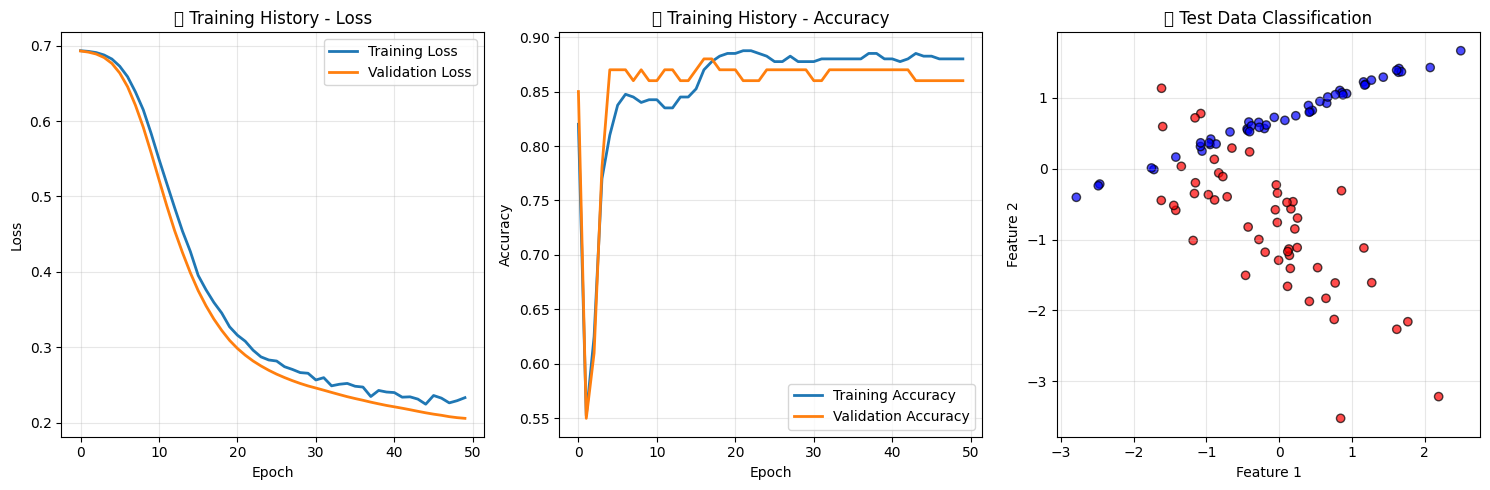

In [7]:
# Plot training history
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 3, 1)
plt.plot(history['loss'], label='Training Loss', linewidth=2)
plt.plot(history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('📉 Training History - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Accuracy plot
plt.subplot(1, 3, 2)
plt.plot(history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('📈 Training History - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Test data visualization
plt.subplot(1, 3, 3)
colors = ['red' if label == 0 else 'blue' for label in y_test[0, :]]
plt.scatter(X_test[0, :], X_test[1, :], c=colors, alpha=0.7, edgecolors='black')
plt.title('🎯 Test Data Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🎯 Step 5: Make Predictions

Let's see how our model performs on new data!

In [8]:
# Make predictions
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)

print(f"🔮 Sample predictions (first 10):")
print(f"Probabilities: {predictions[0, :10]}")
print(f"Binary predictions: {binary_predictions[0, :10]}")
print(f"True labels: {y_test[0, :10].astype(int)}")

# Calculate accuracy manually
accuracy = np.mean(binary_predictions == y_test)
print(f"\n✅ Manual accuracy calculation: {accuracy:.4f}")

🔮 Sample predictions (first 10):
Probabilities: [0.45714477 0.48792309 0.00696458 0.95753582 0.01227322 0.41182637
 0.17917421 0.45304203 0.79424571 0.87935752]
Binary predictions: [0 0 0 1 0 0 0 0 1 1]
True labels: [1 1 0 1 0 1 0 1 0 1]

✅ Manual accuracy calculation: 0.8600


## 🎉 Congratulations!

You've successfully:
- ✅ Loaded the deep learning framework
- ✅ Created and preprocessed data
- ✅ Built a neural network
- ✅ Trained the model
- ✅ Evaluated performance
- ✅ Made predictions

## 🚀 Next Steps:
1. Try different architectures (more layers, different activation functions)
2. Experiment with different optimizers
3. Add regularization (dropout, batch normalization)
4. Try multi-class classification
5. Explore regression problems

Check out the other notebooks for more advanced examples!